Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import skew, kurtosis, zscore

Load the Dataset and Preview the Data

In [ ]:
data = pd.read_csv('UPLOAD SAMPLE_SUBMISSION DATASET')
data.head()

,ID,Time_taken (min)
0,0x2318,25.668333
1,0x3474,27.881667
2,0x9420,27.023333
3,0x72ee,28.153333
4,0xa759,21.018333


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                11399 non-null  object 
 1   Time_taken (min)  11399 non-null  float64
dtypes: float64(1), object(1)
memory usage: 178.2+ KB


In [4]:
data.describe()

,Time_taken (min)
count,11399.000000
mean,26.234647
std,8.408526
min,10.394167
25%,20.143333
50%,24.527500
75%,32.139583
max,52.315833


Check for Missing Values

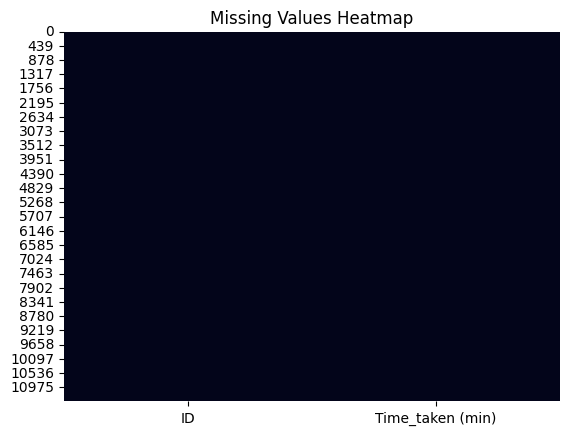

In [5]:
null_check = data.isnull()
sns.heatmap(null_check, cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

# Novelties

1. Univariate Analysis

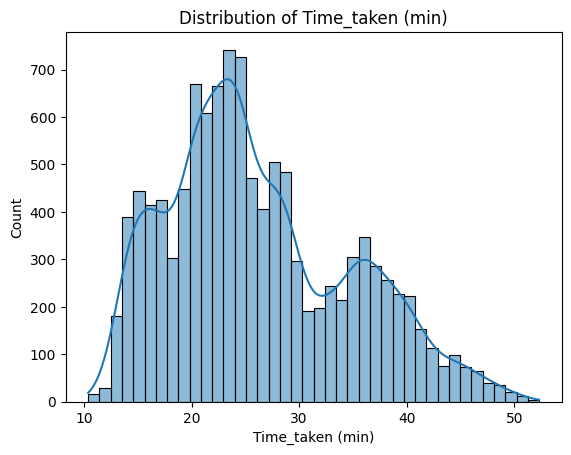

In [6]:
numeric_cols = data.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Advances Statistical Analysis of Time Taken
2. Outlier Detection


In [7]:
data['Time_taken (min)'].describe()

count    11399.000000
mean        26.234647
std          8.408526
min         10.394167
25%         20.143333
50%         24.527500
75%         32.139583
max         52.315833
Name: Time_taken (min), dtype: float64

In [8]:
Skewness = skew(data['Time_taken (min)'])
Kurtosis = kurtosis(data['Time_taken (min)'])

print(f'Skewness: {Skewness}')
print(f'Kurtosis: {Kurtosis}')

Skewness: 0.5684516018810913
Kurtosis: -0.4099905052557995


In [9]:
data['zscore'] = zscore(data['Time_taken (min)'])
outliers_z = data[(data['zscore'] > 3) | (data['zscore'] < -3)]
print(f'Outliers (Z-score):\n {outliers_z}')

print("\n*****************************************************************\n")

Q1 = data['Time_taken (min)'].quantile(0.25)
Q3 = data['Time_taken (min)'].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = data[(data['Time_taken (min)'] < Q1 - 1.5 * IQR) | 
                    (data['Time_taken (min)'] > Q3 + 1.5 * IQR)]

print(f'Outliers (IQR):\n {outliers_iqr}')

Outliers (Z-score):
            ID  Time_taken (min)    zscore
1930  0x96d4          51.779167  3.038064
8063  0xcefb          52.315833  3.101891
9932  0xbfb7          51.660833  3.023990

*****************************************************************

Outliers (IQR):
             ID  Time_taken (min)    zscore
1185   0x6be9          50.170000  2.846682
1517   0x12b4          50.747500  2.915366
1705   0x24d4          50.640000  2.902580
1824   0x7b3b          50.294167  2.861450
1930   0x96d4          51.779167  3.038064
1980   0x281a          50.255000  2.856792
2793   0xc7d4          50.684167  2.907833
4018   0xa57d          50.446667  2.879587
4109   0x62e2          50.394167  2.873343
4986    0xfbe          51.210833  2.970471
8063   0xcefb          52.315833  3.101891
8269   0x4d9f          50.575000  2.894850
8443   0x26b3          50.551667  2.892075
9238   0x144f          50.435000  2.878199
9618   0xd962          50.205833  2.850944
9932   0xbfb7          51.660833  3.02

Time Series Trend

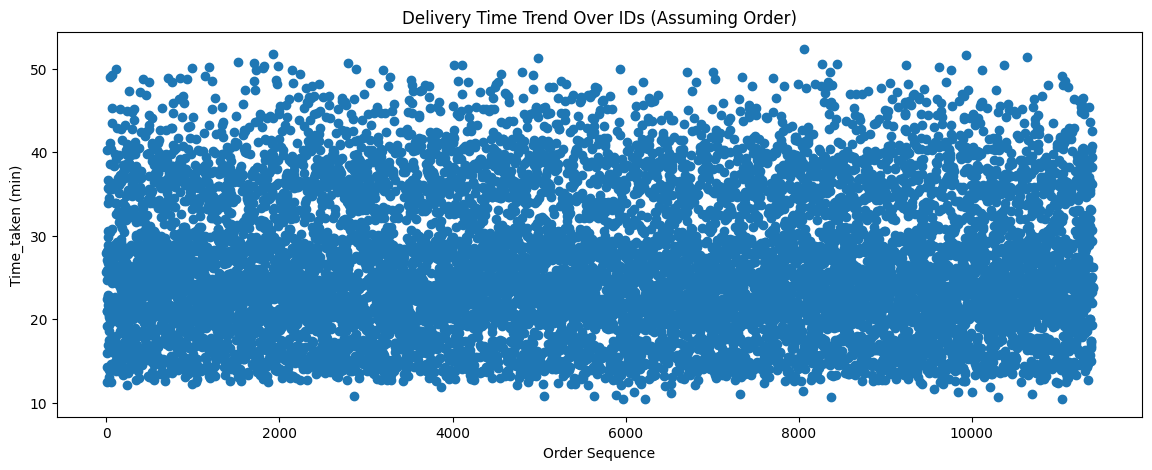

In [10]:
plt.figure(figsize=(14, 5))
plt.plot(data['Time_taken (min)'].reset_index(drop=True), marker='o', linestyle='')
plt.title("Delivery Time Trend Over IDs (Assuming Order)")
plt.xlabel("Order Sequence")
plt.ylabel("Time_taken (min)")
plt.show()


# Visulation Novelties
Violin Plot

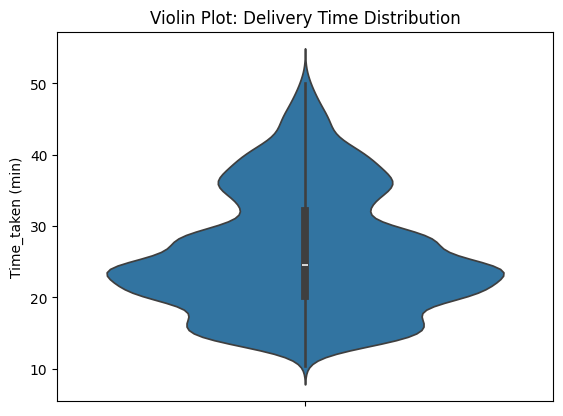

In [11]:
sns.violinplot(y=data['Time_taken (min)'])
plt.title('Violin Plot: Delivery Time Distribution')
plt.show()

Swarm or Strip Plot for Individual Values

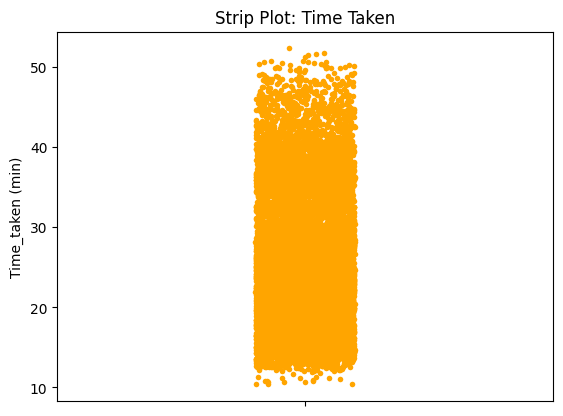

In [12]:
sns.stripplot(y=data['Time_taken (min)'], color="orange", size=4, jitter=True)
plt.title("Strip Plot: Time Taken")
plt.show()

ECDF Plot

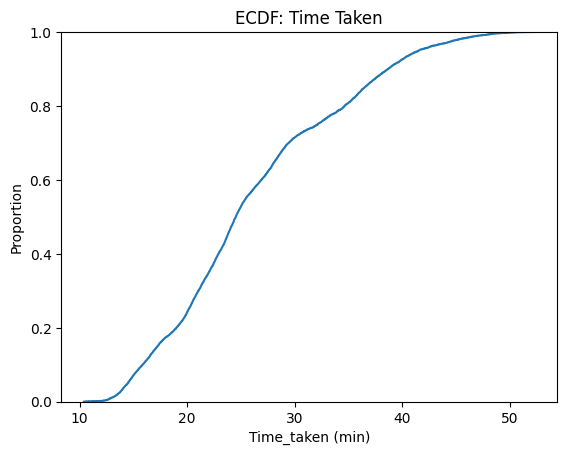

In [13]:
sns.ecdfplot(data['Time_taken (min)'])
plt.title("ECDF: Time Taken")
plt.xlabel("Time_taken (min)")
plt.ylabel("Proportion")
plt.show()


# Interactive Plot with Plotly

In [14]:
import plotly.express as px

fig = px.histogram(data, x='Time_taken (min)', nbins=30, marginal="box", title="Distribution of Delivery Time (Interactive)")
fig.show()
